In [24]:
%matplotlib inline

import pystan
import numpy as np
import matplotlib.pyplot as plt

### 8 schools coaching example from Gelman 2003
Following the pystan tutorial

In [25]:
schools_code = '''
data {
    int<lower=0> j; // Number of schools
    real y[j]; // Treatment effects
    real<lower=0> s[j]; // s.d. of effects
}
parameters {
    real mu;
    real<lower=0> tau;
    real eta[j];
}
transformed parameters {
    real theta[j];
    for (i in 1:j)
    theta[i] = mu + tau * eta[i];
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, s);
}

'''

In [34]:

sm = pystan.StanModel(model_code=schools_code, model_name='EightSchools')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL EightSchools_fd9fb76c325eee51a7100d00fd6eeaf6 NOW.


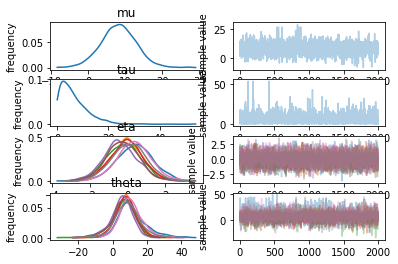

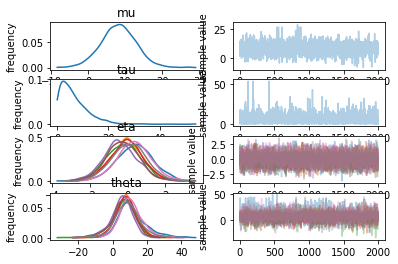

In [39]:
schools_dat = {'j': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               's': [15, 10, 16, 11,  9, 11, 10, 18]}
fit = sm.sampling(data=schools_dat, iter=1000, chains=4, sample_file='samples')
fit.plot()

In [37]:
fit2 = sm.sampling(data=schools_dat, iter=10000, chains=4)

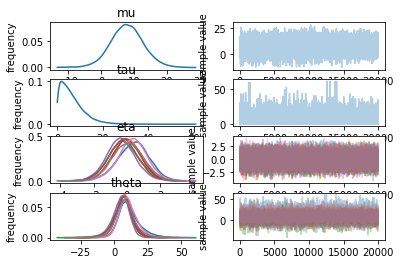

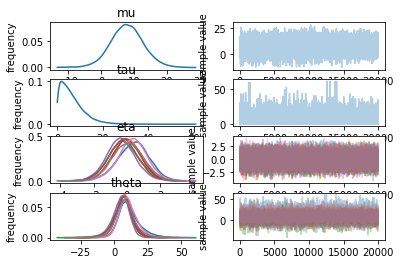

In [38]:
fit2.plot()